# Python Iris Classification with ANN

# 1. Data Loading

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[0:100,:]
y = iris.target[0:100]

# 2. Data Plot

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

plt.title("Iris Data")
plt.scatter(X[:, 2], X[:, 3], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

<Figure size 640x480 with 1 Axes>

# 3. Train Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# 4. Translate from numpy array to pytorch Tensor

In [4]:
import torch
x_train = torch.FloatTensor(X_train)
x_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# 5. ANN Model

In [5]:
class NeuralNet(torch.nn.Module) : 

    def __init__(self, input_size, hidden_size) : 
        
        # Initial
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Layer
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    # Forward
    def forward(self, input_tensor) : 
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

# 6. Hyperparmeter

In [6]:
model = NeuralNet(4,5)                 
learning_rate = 0.03                 
criterion = torch.nn.BCELoss()         
epochs = 5000                      
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 7. Before Training Test Loss

In [7]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before Training, test loss is {}" .format(test_loss_before.item()))

Before Training, test loss is 0.6710463166236877


# 8. Training

In [8]:
train_result = []
test_result = []

for epoch in range(epochs +1) :
    
    model.train()        
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    train_result.append(train_loss.item())
    
    if epoch % 1000 == 0 :
        print("Train loss at {} is {}" .format(epoch, train_loss.item()))
    
    model.eval()
    test_loss = criterion(model(x_test).squeeze(), y_test)
    test_result.append(test_loss.item())

    if epoch % 1000 == 0 :
        print("Test loss at {} is {}" .format(epoch, test_loss.item()))   
        print(" ")
        
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.779538631439209
Test loss at 0 is 0.6710463166236877
 
Train loss at 1000 is 0.0043482170440256596
Test loss at 1000 is 0.002546078059822321
 
Train loss at 2000 is 0.0018844935111701488
Test loss at 2000 is 0.0009748842567205429
 
Train loss at 3000 is 0.0011789698619395494
Test loss at 3000 is 0.0005657916772179306
 
Train loss at 4000 is 0.0008508141036145389
Test loss at 4000 is 0.0003863504680339247
 
Train loss at 5000 is 0.0006625822861678898
Test loss at 5000 is 0.00028818362625315785
 


# 9. Train and Test Loss

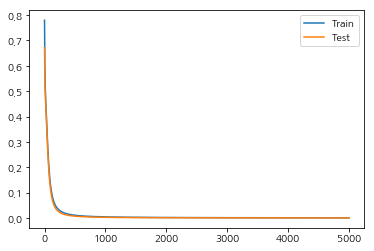

In [9]:
plt.plot(train_result, label="Train")
plt.plot(test_result, label="Test")
plt.legend()
plt.show()

# 10. Confusion Matrix

In [11]:
y_pred_temp = model(x_test)
y_pred = []

for i in y_pred_temp : 
    if i.item() >= 0.5 : 
        y_pred.append(1)
    else : 
        y_pred.append(0)
        
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 0, 10]], dtype=int64)